(20000, 2)
(10, 6, 20000, 2) - (classes, ensaios, linhas, canais)
(10, 6, 2, 20000) - (classes, ensaios, canais, linhas)
 (60, 2, 20000)
Formato (shape) dos dados depois da divisão de janelas
Dominio do tempo: (60, 2, 41, 1024) - (classes+ensaios, canais, janelas, linhas)
Dominio da frequência:  (60, 2, 41, 513) - (classes+ensaios, canais, janelas, linhas)
shape para classificação: (60, 41, 2, 4)
shape para visualização: (4, 10, 246, 2)


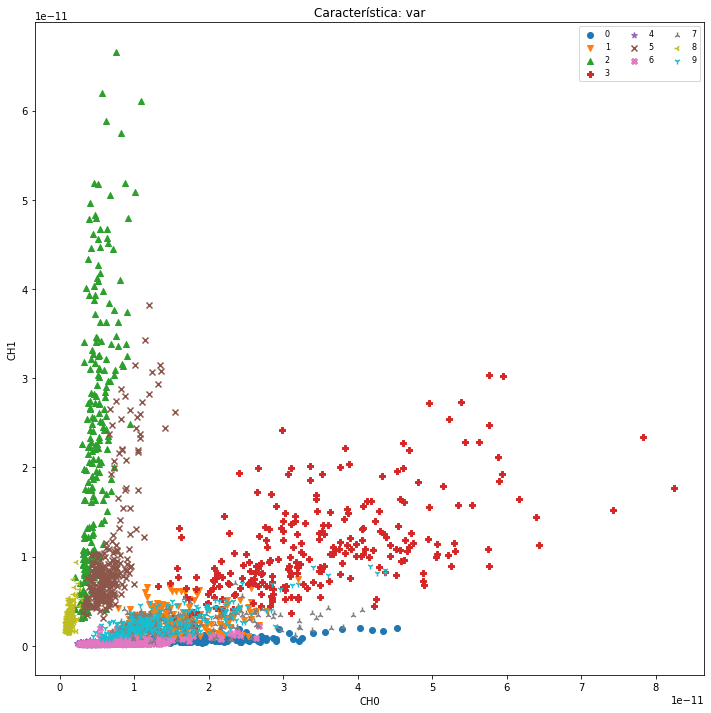

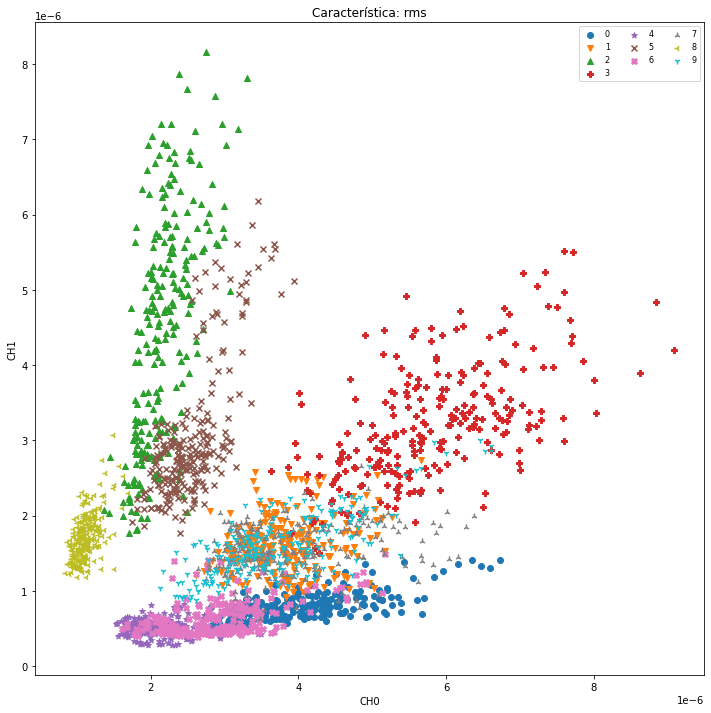

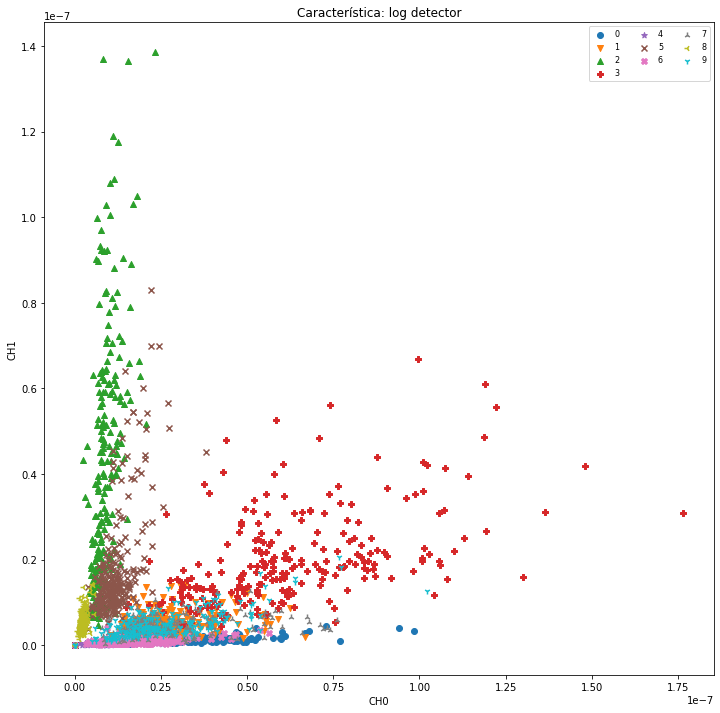

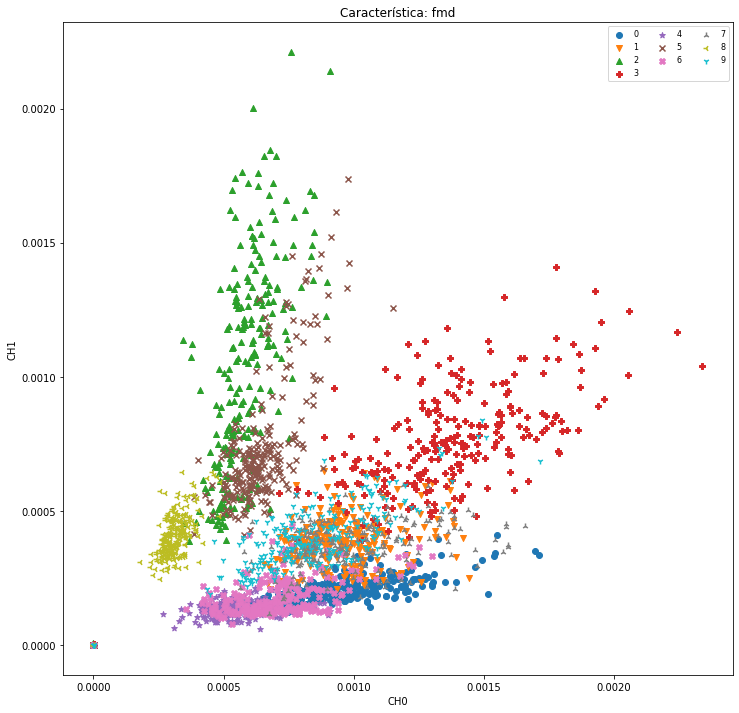

classes + trials, amostras, canais, características
X final: (2460, 8)
Shape dos rótulos: (2460,)
Acurácia: 64.50%


In [1]:
# carregamento dos dados anteriores

%run 06-classification.ipynb

In [26]:
from sklearn.preprocessing import (StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler)
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


for scaler in (StandardScaler(), MinMaxScaler(), MaxAbsScaler(), RobustScaler()):
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, shuffle=True)
    clf = SVC(kernel='rbf', gamma='scale')
    clf.fit(X_train, y_train)
    res = clf.predict(X_test)
    tot_hit = sum([1 for i in range(len(res)) if res[i] == y_test[i]])
    print('Acurácia: {:.2f}%'.format(tot_hit / X_test.shape[0] * 100))

Acurácia: 73.17%
Acurácia: 72.49%
Acurácia: 73.17%
Acurácia: 71.41%
